In [89]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [90]:
pip show mysql-connector-python

Name: mysql-connector-python
Version: 9.2.0
Summary: A self-contained Python driver for communicating with MySQL servers, using an API that is compliant with the Python Database API Specification v2.0 (PEP 249).
Home-page: https://dev.mysql.com/doc/connector-python/en/
Author: Oracle and/or its affiliates
Author-email: 
License: GNU GPLv2 (with FOSS License Exception)
Location: C:\Users\bccb\anaconda3\Lib\site-packages
Requires: 
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [91]:
import mysql.connector
import pandas as pd

print("MySQL connector imported successfully!")

MySQL connector imported successfully!


In [92]:
# Connect to MySQL
connection = mysql.connector.connect(
    host="localhost",       # Replace with your host (e.g., "127.0.0.1")
    user="root",   # Your MySQL username
    password="Sammastan25!!", # Your MySQL password
    database="salary" # Optional: specify database to connect to
)

# Check connection
if connection.is_connected():
    print("Connected to MySQL!")

Connected to MySQL!


In [93]:
#create cursor object to execute sql queries
cursor = connection.cursor()

In [94]:
# Query the data from dataset
cursor.execute("SELECT * FROM dataset")

In [95]:
#After fetching data from the database we are storing it into Pandas DataFrame
dataset = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

In [96]:
#printing first 5 records from table
print(dataset.head())

   MyUnknownColumn  work_year experience_level employment_type  \
0                0       2020               MI              FT   
1                1       2020               SE              FT   
2                2       2020               SE              FT   
3                3       2020               MI              FT   
4                4       2020               SE              FT   

                    job_title  salary salary_currency  salary_in_usd  \
0              Data Scientist   70000             EUR          79833   
1  Machine Learning Scientist  260000             USD         260000   
2           Big Data Engineer   85000             GBP         109024   
3        Product Data Analyst   20000             USD          20000   
4   Machine Learning Engineer  150000             USD         150000   

  employee_residence  remote_ratio company_location company_size  
0                 DE             0               DE            L  
1                 JP             0  

In [97]:
# print last 5 records from the data
print(dataset.tail())

     MyUnknownColumn  work_year experience_level employment_type  \
602              602       2022               SE              FT   
603              603       2022               SE              FT   
604              604       2022               SE              FT   
605              605       2022               SE              FT   
606              606       2022               MI              FT   

         job_title  salary salary_currency  salary_in_usd employee_residence  \
602  Data Engineer  154000             USD         154000                 US   
603  Data Engineer  126000             USD         126000                 US   
604   Data Analyst  129000             USD         129000                 US   
605   Data Analyst  150000             USD         150000                 US   
606   AI Scientist  200000             USD         200000                 IN   

     remote_ratio company_location company_size  
602           100               US            M  
603       

In [98]:
# print the information and data type of the dataset
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   MyUnknownColumn     607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB
None



Missing Values per Column:
MyUnknownColumn       0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64


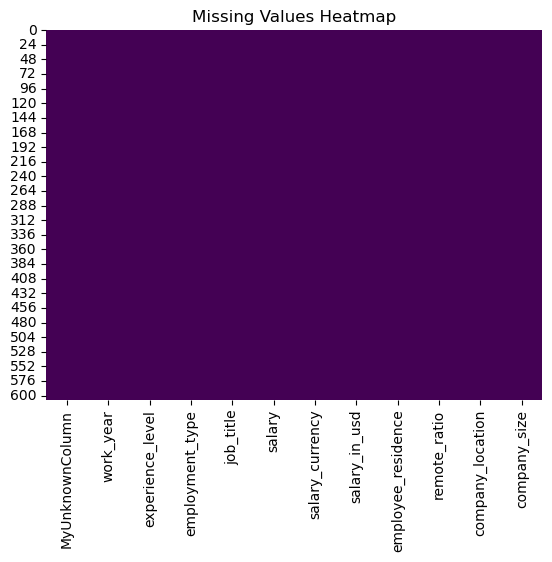

In [99]:
#EDA
# Check for missing values
missing_values = dataset.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)

# Visualize missing values (if any)
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(dataset.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [100]:
# Check for duplicate rows
duplicates = dataset.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")


Number of duplicate rows: 0


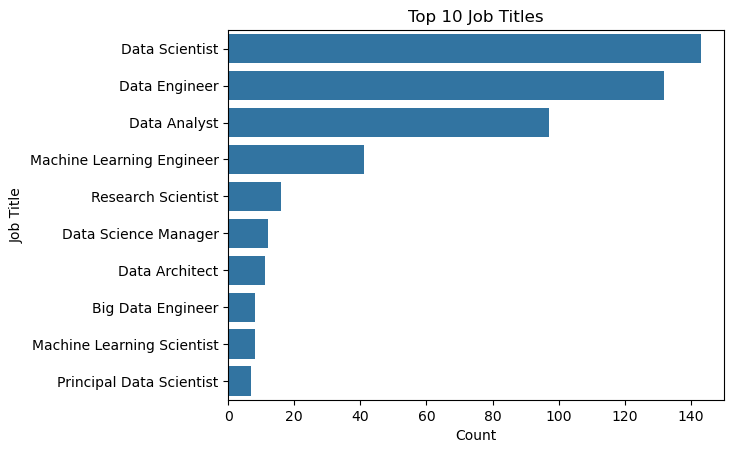

In [101]:
# Count plot of job titles
sns.countplot(y='job_title', data=dataset, order=dataset['job_title'].value_counts().index[:10])
plt.title("Top 10 Job Titles")
plt.xlabel("Count")
plt.ylabel("Job Title")
plt.show()

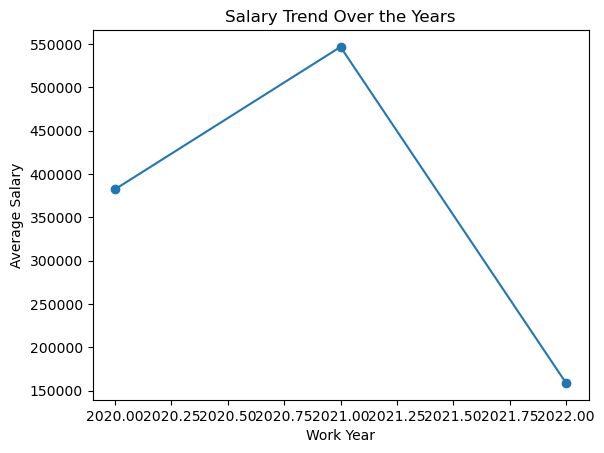

In [102]:
# Salary trend over years
salary_trend = dataset.groupby('work_year')['salary'].mean()
salary_trend.plot(kind='line', marker='o', title='Salary Trend Over the Years', ylabel='Average Salary', xlabel='Work Year')
plt.show()

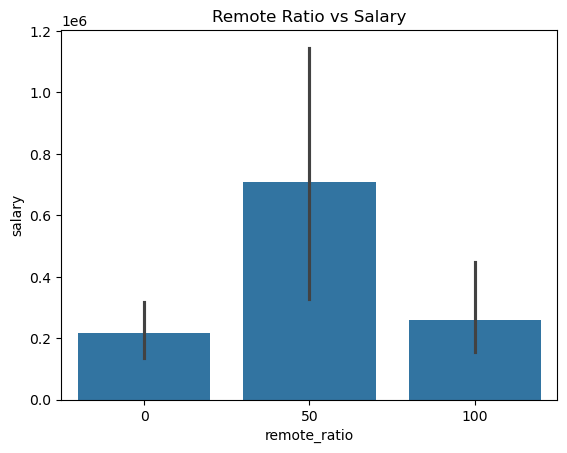

In [103]:
# Salary distribution by remote ratio 
#Remote Work Impact
import seaborn as sns

sns.barplot(x='remote_ratio', y='salary', data=dataset)
plt.title('Remote Ratio vs Salary')
plt.show()

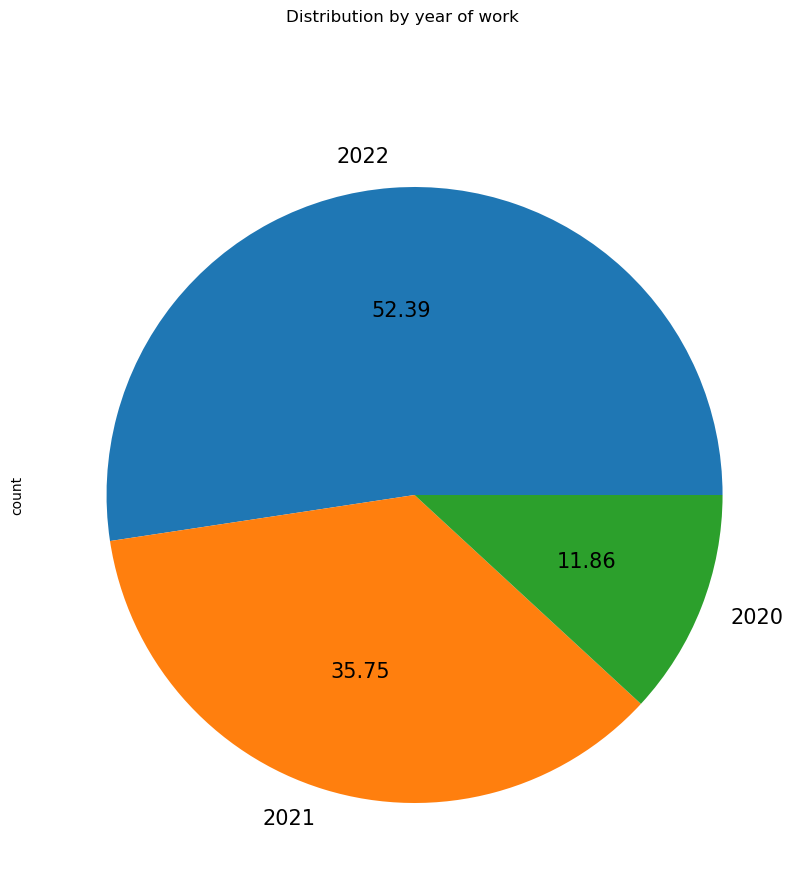

In [104]:
#Distribution by the year of work
dataset['work_year'].value_counts().plot(kind='pie', subplots=True, autopct='%1.2f', figsize=(10,10), title='Distribution by year of work', fontsize=15)
plt.show()

In [105]:
#Experience levels:-  SE: Senior Level; MI: Mid-Level; EN: Entry Level; EX: Executive Level

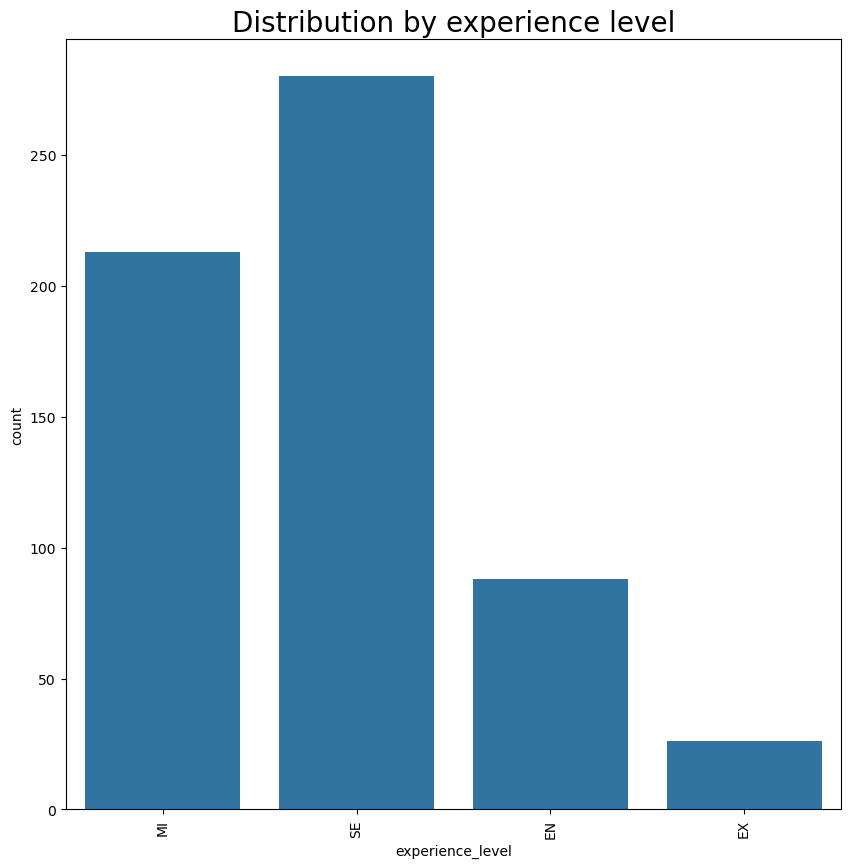

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

In [106]:
#Distribution by experience level
plt.figure(figsize=(10,10))
sns.countplot(data=dataset,x='experience_level')
plt.xticks(rotation=90)
plt.title('Distribution by experience level',fontsize = 20)
plt.show()

dataset['experience_level'].value_counts()

In [107]:
#Understand the overall salary distribution and compare salary and salary_in_usd.

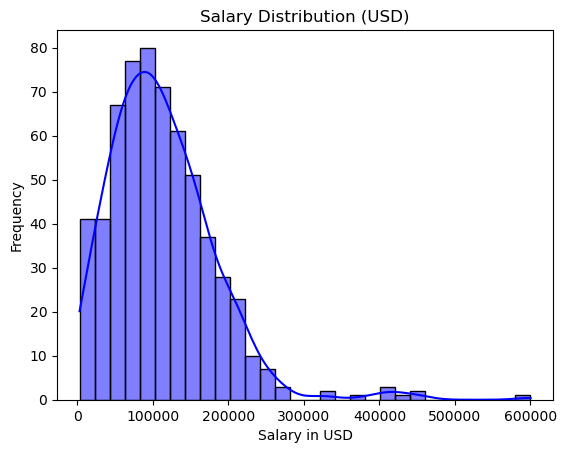

In [108]:
# Distribution of salaries in USD
sns.histplot(dataset['salary_in_usd'], kde=True, bins=30, color='blue')
plt.title("Salary Distribution (USD)")
plt.xlabel("Salary in USD")
plt.ylabel("Frequency")
plt.show()

C:\Users\bccb\AppData\Local\Temp\ipykernel_5916\3315099028.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='remote_ratio', data=dataset, palette='viridis')


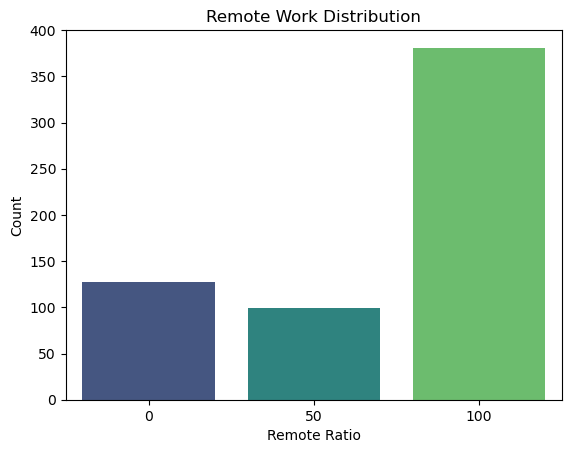

In [109]:
#Understand the distribution of remote jobs and how they affect salaries

# Count plot of remote ratio
sns.countplot(x='remote_ratio', data=dataset, palette='viridis')
plt.title("Remote Work Distribution")
plt.xlabel("Remote Ratio")
plt.ylabel("Count")
plt.show()

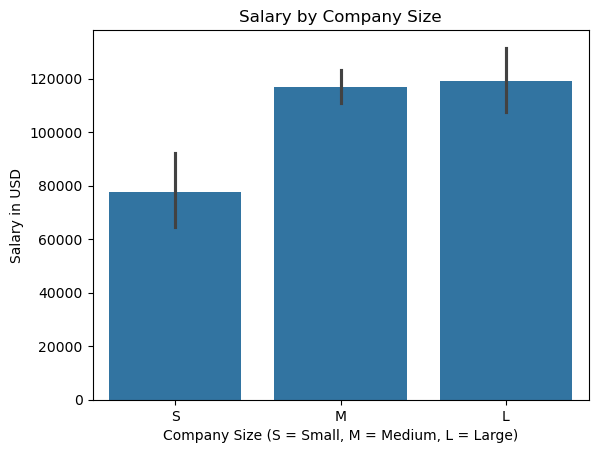

In [110]:
# Analyze how company_size impacts salaries
sns.barplot(x='company_size', y='salary_in_usd', data=dataset, order=['S', 'M', 'L'])
plt.title("Salary by Company Size")
plt.xlabel("Company Size (S = Small, M = Medium, L = Large)")
plt.ylabel("Salary in USD")
plt.show()

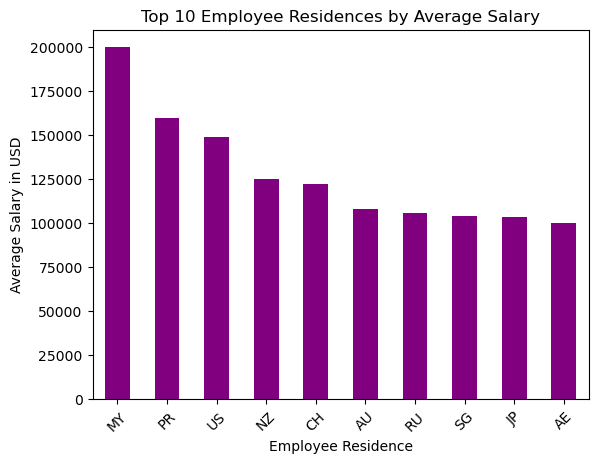

In [111]:
# Top 10 employee residences by average salary
top_residences = dataset.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)
top_residences.plot(kind='bar', color='purple')
plt.title("Top 10 Employee Residences by Average Salary")
plt.xlabel("Employee Residence")
plt.ylabel("Average Salary in USD")
plt.xticks(rotation=45)
plt.show()

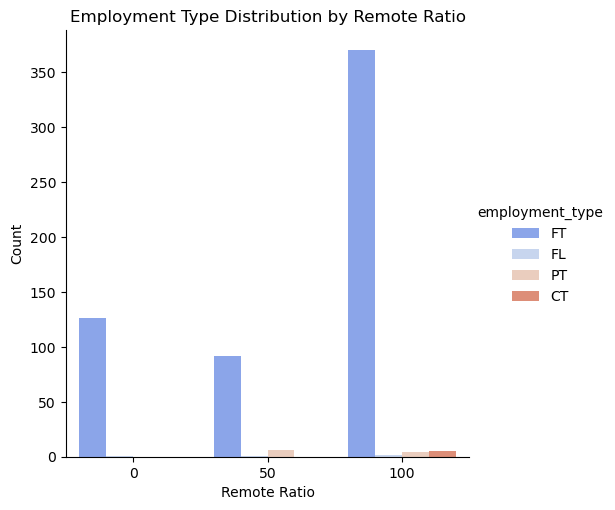

In [112]:
# See if remote_ratio affects the distribution of employment_type.
sns.catplot(x='remote_ratio', hue='employment_type', kind='count', data=dataset, palette='coolwarm')
plt.title("Employment Type Distribution by Remote Ratio")
plt.xlabel("Remote Ratio")
plt.ylabel("Count")
plt.show()

C:\Users\bccb\AppData\Local\Temp\ipykernel_5916\337359066.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='salary_currency', data=dataset , palette='pastel', order=dataset['salary_currency'].value_counts().index)


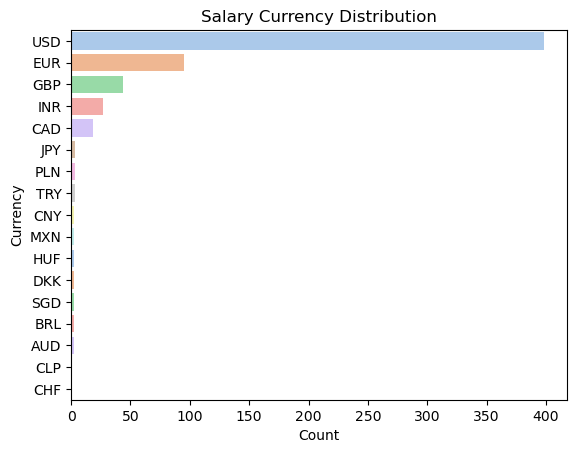

In [113]:
# Count plot of salary currencies
sns.countplot(y='salary_currency', data=dataset , palette='pastel', order=dataset['salary_currency'].value_counts().index)
plt.title("Salary Currency Distribution")
plt.xlabel("Count")
plt.ylabel("Currency")
plt.show()

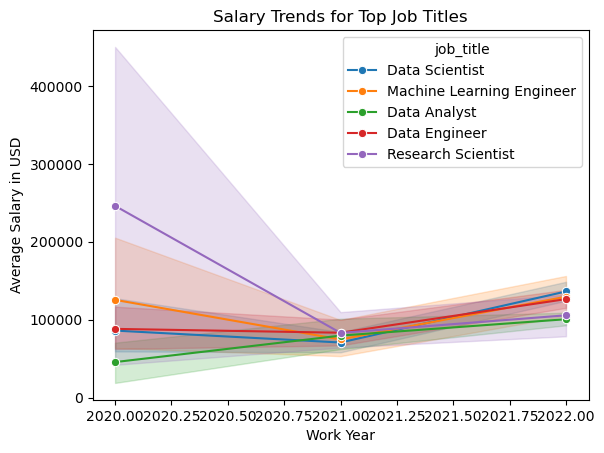

In [114]:
# Salary trends for top job titles over the years
top_jobs = dataset['job_title'].value_counts().head(5).index
dataset_top_jobs = dataset[dataset['job_title'].isin(top_jobs)]

sns.lineplot(x='work_year', y='salary_in_usd', hue='job_title', data=dataset_top_jobs, marker='o')
plt.title("Salary Trends for Top Job Titles")
plt.xlabel("Work Year")
plt.ylabel("Average Salary in USD")
plt.show()

In [115]:
# Conclusion: Thus we have seen that due to the use of AI, more data science jobs have been created. But the salaries of the employees have been declining due to more than sufficient people to fill the role. Also, most of the salary is been distributed in USD, where hightest salary has been given to Research Scientist. According to this dataset, hightest average salary is been given in Malaysia. Large companies have the highest salary distribution.